<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2020 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 3 (três) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes, e separe os 50 (cinquenta) ativos mais líquidos; </li><p></p>
    <li>Construa uma amostra de treinamento e outra de teste, sendo a primeira com os 2 (dois) primeiros anos e a segunda com o último anos; </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz, nos ativos separados na fase de treinamento, amostra de teste que representa o último ano da aquisição; </li><p></p>
    <li> Descreva suas impressores relativas ao processo e resultados encontrados. </li>
</ol>
</div>


### Questão 1: 

In [1]:
import pandas as pd
from pandas_datareader import data 
import investpy
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
lista = ['IFNC', 'BDRX', 'IMOB', 'ICON', 'IEE']

In [3]:
output = None
symbols=[]

for sy in tqdm(lista):
    try: 
        df = pd.read_html(f'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={sy}&idioma=pt-br')
        symbols=list(df[0]['Código'].values)        
        Symbols=[sy+'.SA' for sy in symbols]
        print(f"Ativos indice {sy} =", len(Symbols))
        
        if output is None:
            Ativos = Symbols
            output = Ativos
        else:
            Ativos = Symbols
            output = output + Ativos
    except:
        print("Erro ")
        
len(output)

 20%|████████████████▊                                                                   | 1/5 [00:00<00:02,  1.83it/s]

Ativos indice IFNC = 21


 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:01,  1.61it/s]

Ativos indice BDRX = 129


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:04<00:02,  1.23s/it]

Ativos indice IMOB = 21


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:04<00:00,  1.04it/s]

Ativos indice ICON = 66


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.08it/s]

Ativos indice IEE = 19


256

In [4]:
def remove_repetidos(output):
    l = []
    for i in output:
        if i not in l:
            l.append(i)
    l.sort()
    return l

output.remove('Quantidade Teórica Total  Redutor.SA')
output = remove_repetidos(output)

sorted(output)


['A1BM34.SA',
 'A1MD34.SA',
 'A1PA34.SA',
 'AALL34.SA',
 'AALR3.SA',
 'AAPL34.SA',
 'ABBV34.SA',
 'ABCB4.SA',
 'ABEV3.SA',
 'ABTT34.SA',
 'ABUD34.SA',
 'ADBE34.SA',
 'ALPA4.SA',
 'ALSO3.SA',
 'ALUP11.SA',
 'AMAR3.SA',
 'AMGN34.SA',
 'AMZO34.SA',
 'ANIM3.SA',
 'ARMT34.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'ATTB34.SA',
 'ATVI34.SA',
 'AVGO34.SA',
 'AXPB34.SA',
 'B1SX34.SA',
 'B3SA3.SA',
 'BABA34.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BBYY34.SA',
 'BCSA34.SA',
 'BEEF3.SA',
 'BERK34.SA',
 'BIDI11.SA',
 'BIDI4.SA',
 'BIDU34.SA',
 'BIIB34.SA',
 'BKBR3.SA',
 'BKNG34.SA',
 'BLAK34.SA',
 'BMGB4.SA',
 'BMYB34.SA',
 'BOAC34.SA',
 'BOEI34.SA',
 'BONY34.SA',
 'BOXP34.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'BRSR6.SA',
 'BTOW3.SA',
 'C1CL34.SA',
 'CAML3.SA',
 'CEAB3.SA',
 'CESP6.SA',
 'CHCM34.SA',
 'CHVX34.SA',
 'CIEL3.SA',
 'CMCS34.SA',
 'CMIG4.SA',
 'CNTO3.SA',
 'COCA34.SA',
 'COCE5.SA',
 'COGN3.SA',
 'COPH34.SA',
 'COTY34.SA',
 'COWC34.SA',
 'CPFE3.SA

In [5]:
len(output)

240

In [6]:
listaS = output
listaS

['A1BM34.SA',
 'A1MD34.SA',
 'A1PA34.SA',
 'AALL34.SA',
 'AALR3.SA',
 'AAPL34.SA',
 'ABBV34.SA',
 'ABCB4.SA',
 'ABEV3.SA',
 'ABTT34.SA',
 'ABUD34.SA',
 'ADBE34.SA',
 'ALPA4.SA',
 'ALSO3.SA',
 'ALUP11.SA',
 'AMAR3.SA',
 'AMGN34.SA',
 'AMZO34.SA',
 'ANIM3.SA',
 'ARMT34.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'ATTB34.SA',
 'ATVI34.SA',
 'AVGO34.SA',
 'AXPB34.SA',
 'B1SX34.SA',
 'B3SA3.SA',
 'BABA34.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BBYY34.SA',
 'BCSA34.SA',
 'BEEF3.SA',
 'BERK34.SA',
 'BIDI11.SA',
 'BIDI4.SA',
 'BIDU34.SA',
 'BIIB34.SA',
 'BKBR3.SA',
 'BKNG34.SA',
 'BLAK34.SA',
 'BMGB4.SA',
 'BMYB34.SA',
 'BOAC34.SA',
 'BOEI34.SA',
 'BONY34.SA',
 'BOXP34.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'BRSR6.SA',
 'BTOW3.SA',
 'C1CL34.SA',
 'CAML3.SA',
 'CEAB3.SA',
 'CESP6.SA',
 'CHCM34.SA',
 'CHVX34.SA',
 'CIEL3.SA',
 'CMCS34.SA',
 'CMIG4.SA',
 'CNTO3.SA',
 'COCA34.SA',
 'COCE5.SA',
 'COGN3.SA',
 'COPH34.SA',
 'COTY34.SA',
 'COWC34.SA',
 'CPFE3.SA

In [7]:
len(listaS)

240

In [8]:
start_date = '2018-03-15'
end_date = '2021-03-15'

N= len(listaS)
output = None

for sy in tqdm(listaS[:N]): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Volume"]
        
        if output is None:
            df = stock
            output = df          
        else:
            df = stock
            output=pd.concat([output, df], axis=1)         
    except:
        print("Erro "+ sy)

output.columns=listaS[:N-1]
output.head()

 80%|███████████████████████████████████████████████████████████████▋                | 191/240 [06:32<02:27,  3.01s/it]

Erro Quantidade Teórica Total  Redutor.SA


100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [08:17<00:00,  2.07s/it]


,A1BM34.SA,A1MD34.SA,A1PA34.SA,AALL34.SA,AALR3.SA,AAPL34.SA,ABBV34.SA,ABCB4.SA,ABEV3.SA,ABTT34.SA,...,UPSS34.SA,USSX34.SA,VERZ34.SA,VISA34.SA,VIVA3.SA,VULC3.SA,VVAR3.SA,WALM34.SA,WFCO34.SA,WGBA34.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15,NaN,NaN,NaN,0.0,126600.0,50400.0,100.0,367865.0,17960100.0,900.0,...,0.0,1000.0,8000.0,NaN,810400.0,30700.0,3200.0,700.0,NaN,5345900.0
2018-08-16,NaN,NaN,NaN,0.0,191500.0,34800.0,0.0,248198.0,10816900.0,700.0,...,0.0,600.0,4000.0,NaN,288900.0,17700.0,97400.0,700.0,NaN,2947300.0
2018-08-17,NaN,NaN,NaN,0.0,230600.0,46000.0,0.0,758293.0,20326000.0,800.0,...,0.0,600.0,4000.0,NaN,433500.0,23300.0,3300.0,600.0,NaN,1697500.0
2018-08-20,NaN,NaN,NaN,0.0,113500.0,92400.0,600.0,171845.0,13221500.0,1000.0,...,500.0,2700.0,80000.0,NaN,971500.0,12200.0,9400.0,900.0,NaN,2628900.0
2018-08-21,NaN,NaN,NaN,0.0,608800.0,70800.0,0.0,526313.0,11065800.0,600.0,...,0.0,1700.0,24000.0,NaN,1131600.0,16500.0,2500.0,800.0,NaN,2452000.0


In [9]:
output.describe()

,A1BM34.SA,A1MD34.SA,A1PA34.SA,AALL34.SA,AALR3.SA,AAPL34.SA,ABBV34.SA,ABCB4.SA,ABEV3.SA,ABTT34.SA,...,UPSS34.SA,USSX34.SA,VERZ34.SA,VISA34.SA,VIVA3.SA,VULC3.SA,VVAR3.SA,WALM34.SA,WFCO34.SA,WGBA34.SA
count,261.000000,291.000000,279.000000,632.000000,6.320000e+02,6.320000e+02,632.000000,6.320000e+02,6.320000e+02,632.000000,...,632.000000,632.000000,632.000000,3.470000e+02,6.320000e+02,6.320000e+02,632.000000,632.000000,446.000000,6.320000e+02
mean,69.567050,849.958763,582.598566,1571.376582,3.986987e+05,1.007568e+05,407.424051,6.706645e+05,2.496195e+07,960.193038,...,525.091772,3253.022152,25331.265823,1.614495e+06,7.881793e+05,4.654888e+07,9819.683544,3362.139241,626.038117,3.370545e+06
std,176.471855,1724.439569,1119.267590,4882.262384,3.858984e+05,1.319359e+05,2279.443872,3.927509e+05,1.407445e+07,5670.023748,...,1792.516471,22559.164561,40167.068188,1.148566e+06,5.394903e+05,4.658219e+07,29223.632911,8769.629481,3281.860644,1.758450e+06
min,0.000000,0.000000,0.000000,0.000000,2.190000e+04,0.000000e+00,0.000000,1.070000e+05,4.966100e+06,0.000000,...,0.000000,0.000000,0.000000,1.657000e+05,1.195000e+05,6.000000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,20.000000,0.000000,0.000000,1.446250e+05,2.670000e+04,0.000000,3.757178e+05,1.607265e+07,0.000000,...,0.000000,100.000000,6000.000000,9.047000e+05,4.186000e+05,1.651795e+07,1000.000000,200.000000,0.000000,2.228525e+06
50%,3.000000,218.000000,74.000000,0.000000,2.684000e+05,5.577150e+04,0.000000,5.978500e+05,2.128185e+07,0.000000,...,0.000000,275.000000,14700.000000,1.287900e+06,6.585000e+05,3.470685e+07,2475.000000,660.000000,0.000000,3.004900e+06
75%,80.000000,685.000000,730.000000,761.000000,5.220250e+05,1.236975e+05,100.000000,8.576498e+05,3.078510e+07,500.000000,...,100.000000,1000.000000,30712.250000,1.949850e+06,9.757250e+05,6.373670e+07,6700.000000,2237.500000,100.000000,4.130425e+06
max,1610.000000,10338.000000,10400.000000,58331.000000,2.956100e+06,1.462286e+06,30800.000000,3.287500e+06,1.440625e+08,114903.000000,...,29000.000000,436541.000000,514160.000000,8.249700e+06,4.426500e+06,5.399875e+08,415949.000000,90370.000000,44800.000000,1.535930e+07


In [10]:
output.std()

A1BM34.SA    1.764719e+02
A1MD34.SA    1.724440e+03
A1PA34.SA    1.119268e+03
AALL34.SA    4.882262e+03
AALR3.SA     3.858984e+05
                 ...     
VULC3.SA     4.658219e+07
VVAR3.SA     2.922363e+04
WALM34.SA    8.769629e+03
WFCO34.SA    3.281861e+03
WGBA34.SA    1.758450e+06
Length: 239, dtype: float64

In [11]:
media_volumes = output.std().sort_values(ascending=False)

In [12]:
media_volumes_cinquenta = media_volumes.head(50).index
media_volumes_cinquenta

Index(['VULC3.SA', 'COGN3.SA', 'IRBR3.SA', 'CIEL3.SA', 'MGLU3.SA', 'BBDC4.SA',
       'ITUB4.SA', 'ABEV3.SA', 'TAEE11.SA', 'ITSA4.SA', 'PCAR3.SA', 'HAPV3.SA',
       'BRML3.SA', 'BBAS3.SA', 'JBSS3.SA', 'MEAL3.SA', 'MRFG3.SA', 'CMIG4.SA',
       'B3SA3.SA', 'NTCO3.SA', 'JHSF3.SA', 'LAME4.SA', 'ENEV3.SA', 'GFSA3.SA',
       'BRFS3.SA', 'CRFB3.SA', 'BEEF3.SA', 'LREN3.SA', 'REGN34.SA', 'EQTL3.SA',
       'ELET3.SA', 'CVCB3.SA', 'R1IN34.SA', 'CYRE3.SA', 'MULT3.SA', 'NEOE3.SA',
       'BPAN4.SA', 'SNEC34.SA', 'LJQQ3.SA', 'ASAI3.SA', 'AMAR3.SA', 'GNDI3.SA',
       'SSFO34.SA', 'BIDI4.SA', 'QUAL3.SA', 'LCAM3.SA', 'BBDC3.SA', 'MRVE3.SA',
       'BBSE3.SA', 'LIGT3.SA'],
      dtype='object')

### Questão 2: 

In [13]:
#Período da amostra de Treinamento
start_date = '2018-03-15'
end_date = '2020-03-15'

output = None
sym=[]
for sy in tqdm(media_volumes_cinquenta): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df    
            sym.append(sy[:-3])
        else:
            df = stock
            output=pd.concat([output,df],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
output.columns=sym
output.head()

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:26<00:18,  1.90s/it]

Erro ASAI3.SA


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:49<00:00,  2.18s/it]


,VULC3,COGN3,IRBR3,CIEL3,MGLU3,BBDC4,ITUB4,ABEV3,TAEE11,ITSA4,...,AMAR3,GNDI3,SSFO34,BIDI4,QUAL3,LCAM3,BBDC3,MRVE3,BBSE3,LIGT3
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15,5.00,9.801248,18.637688,12.583554,4.078980,21.878670,26.615700,18.453733,16.428099,8.898430,...,4.60,24.397371,261.399994,3.688645,16.676851,8.908088,19.768425,10.451382,20.125956,12.554341
2018-08-16,5.05,9.849768,18.684790,12.727997,4.009268,21.878670,26.579544,18.064131,16.651936,8.811020,...,4.53,25.389116,261.399994,3.813089,16.556341,8.741842,19.436913,10.297702,20.568808,13.228134
2018-08-17,5.00,9.907994,18.543478,12.464602,3.931312,21.211634,25.898582,18.225674,16.308186,8.697385,...,4.56,25.418873,261.399994,3.573773,16.408018,8.776346,18.917089,10.097868,20.481819,13.773112
2018-08-20,5.62,9.743021,18.794735,12.286172,4.070151,21.345047,26.004967,18.197166,16.108332,8.678457,...,4.51,25.537907,289.980011,3.543462,16.037214,8.632055,18.939693,10.090176,20.189220,13.525394
2018-08-21,5.17,9.555785,18.622049,12.243690,3.895722,20.826269,25.668741,18.035624,15.788562,8.482031,...,4.53,24.813889,289.980011,3.572177,15.304879,7.951405,18.306860,10.028721,20.062693,13.178590


['Erros', 1932, 'Ativos', 49]

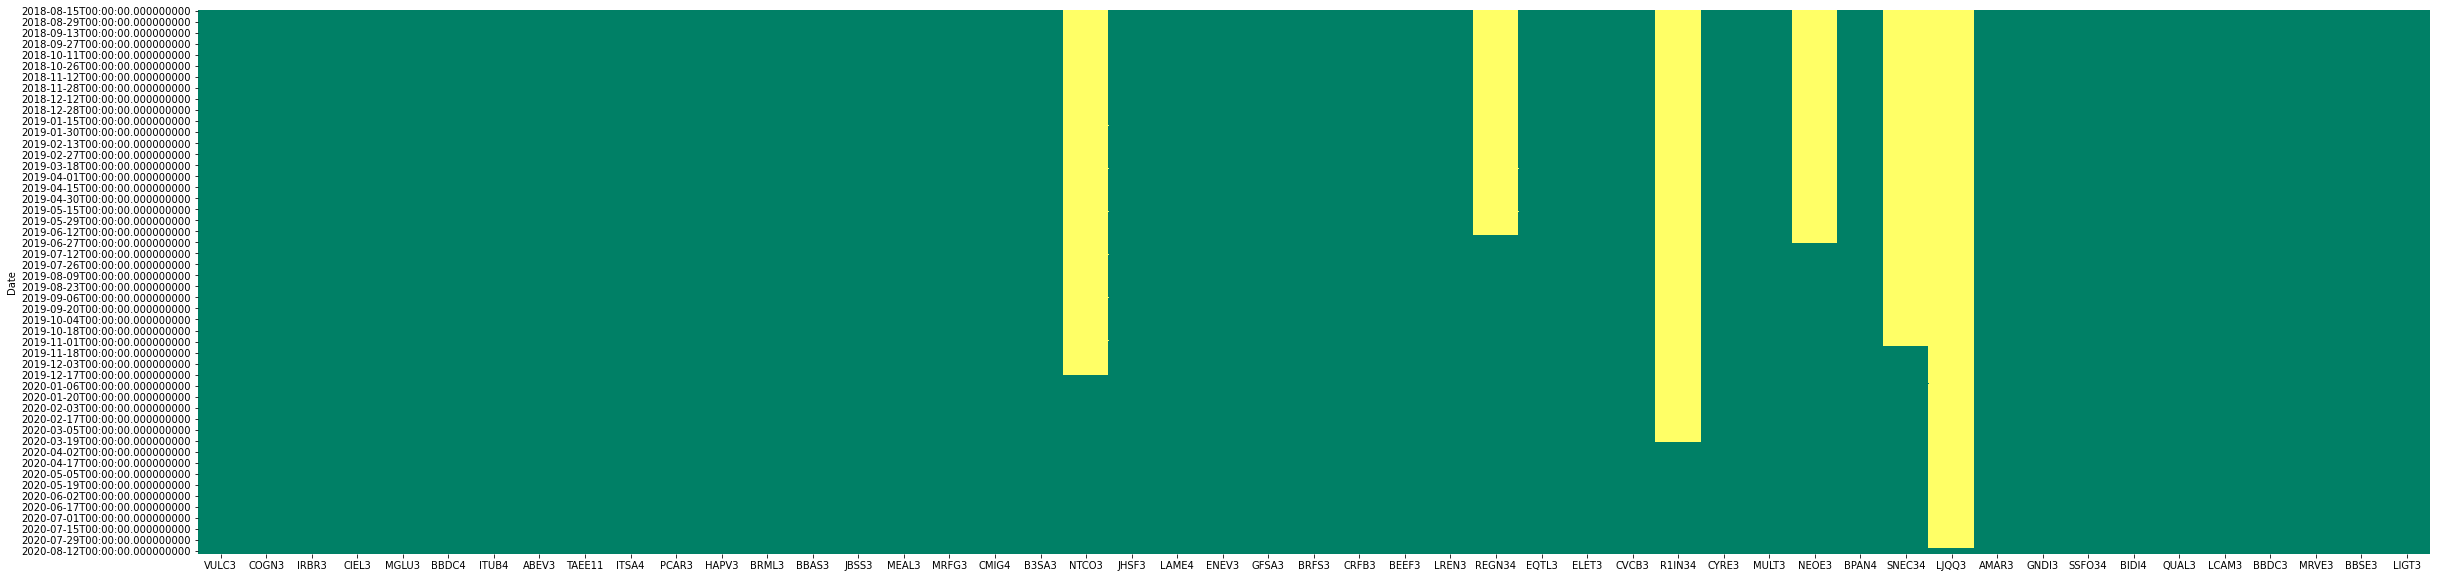

In [14]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 43]

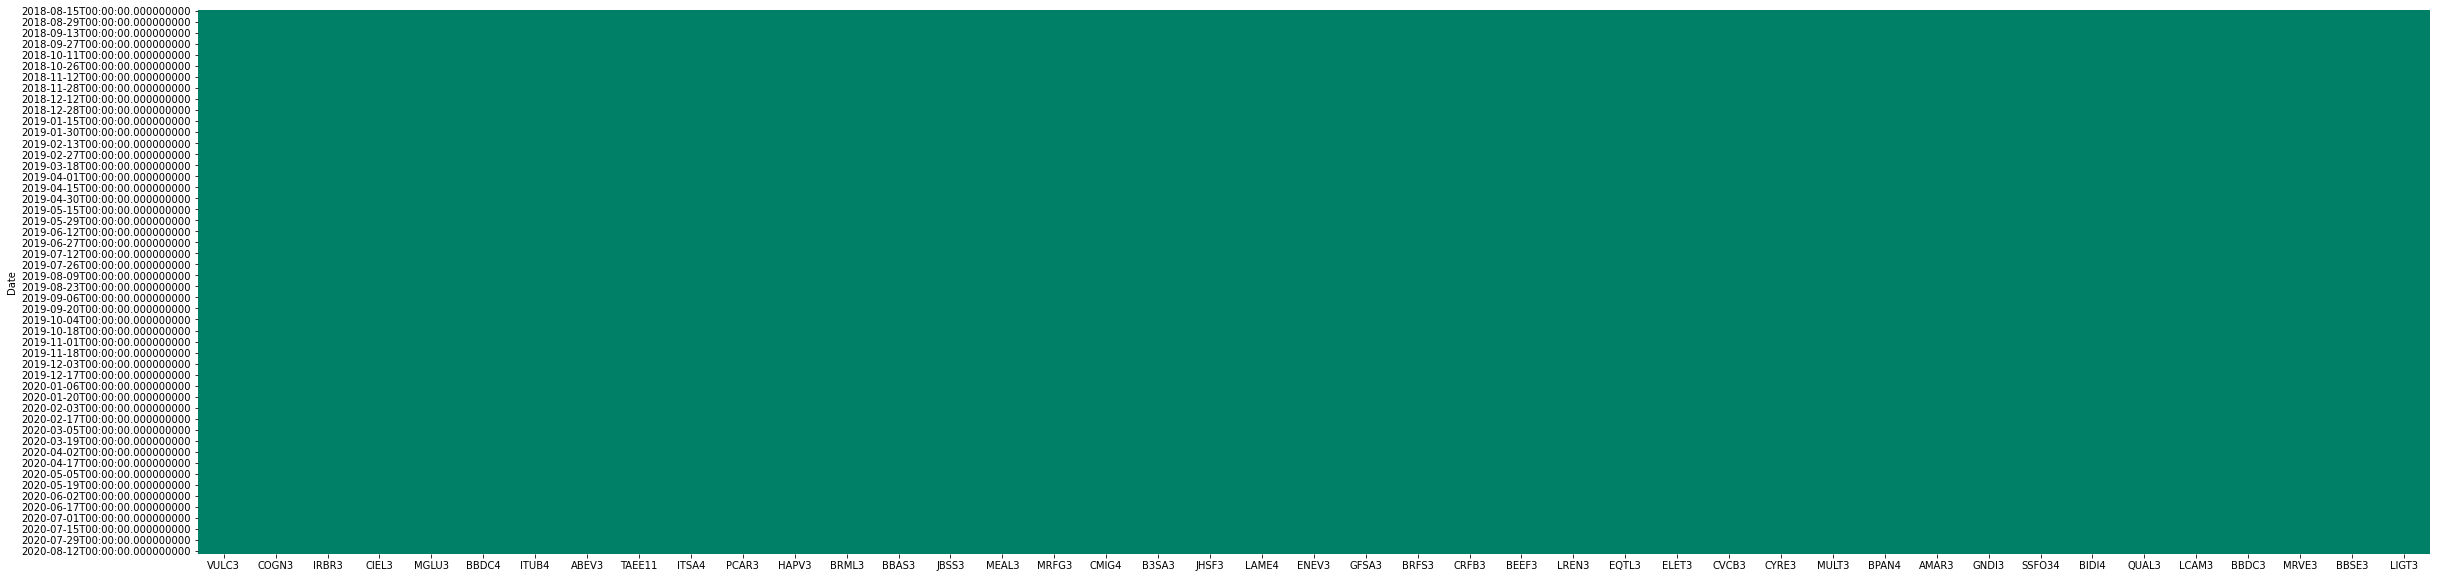

In [15]:
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

### Questão 3: 

In [17]:
from sklearn.cluster import KMeans
wcss = []
retornos=100*output.pct_change()
stocks=retornos.columns
X=np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [18]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Ativos com Melhor Relação em Cada Cluster: ['JHSF3', 'ENEV3', 'B3SA3', 'TAEE11', 'BIDI4']


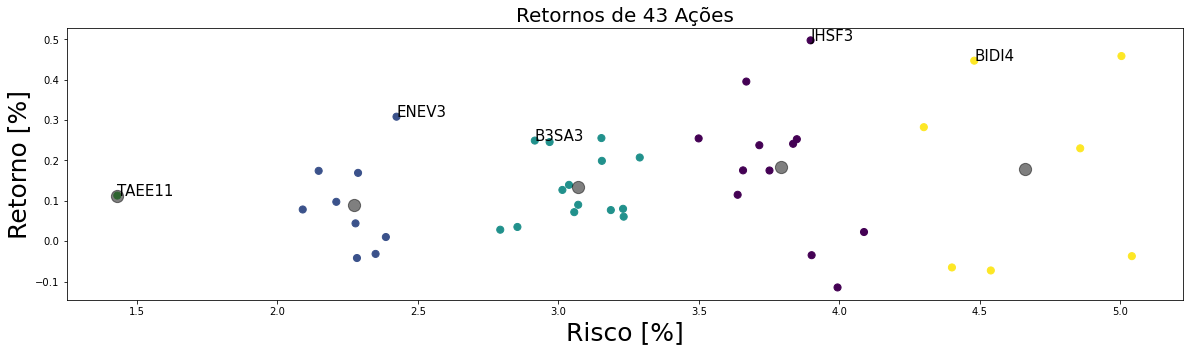

In [27]:
from math import *
retornos=100*output.pct_change()
stocks=retornos.columns


X=np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=optimal_number_of_clusters(wcss)

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações',fontsize=20)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)

### Questão 4: 

In [28]:
rb=list(pd.DataFrame(best).columns)

In [29]:
df=pd.DataFrame(output[rb])

In [36]:
ret=df.diff().dropna().copy()
ret=100*ret/df.iloc[0]

In [38]:
import random
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for n in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU[0]))
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=Portfolios(ret,1000)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1267.38it/s]


In [39]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    #N=1000
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(ret,1000)

100%|██████████████████████████████████████████████████████████████████████████████| 750/750 [00:00<00:00, 1335.61it/s]


In [40]:
def TPM_Menor_Risco(ret):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
    mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
    risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5
    return q_minrisk,mu_minrisk,risk_minrisk

q_minrisk,mu_minrisk,risk_minrisk = TPM_Menor_Risco(ret)

In [41]:
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.00
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)


Os pesos dos ativos no portifólio de menor risco: [0.12, 0.39, 0.01, 0.41, 0.07]



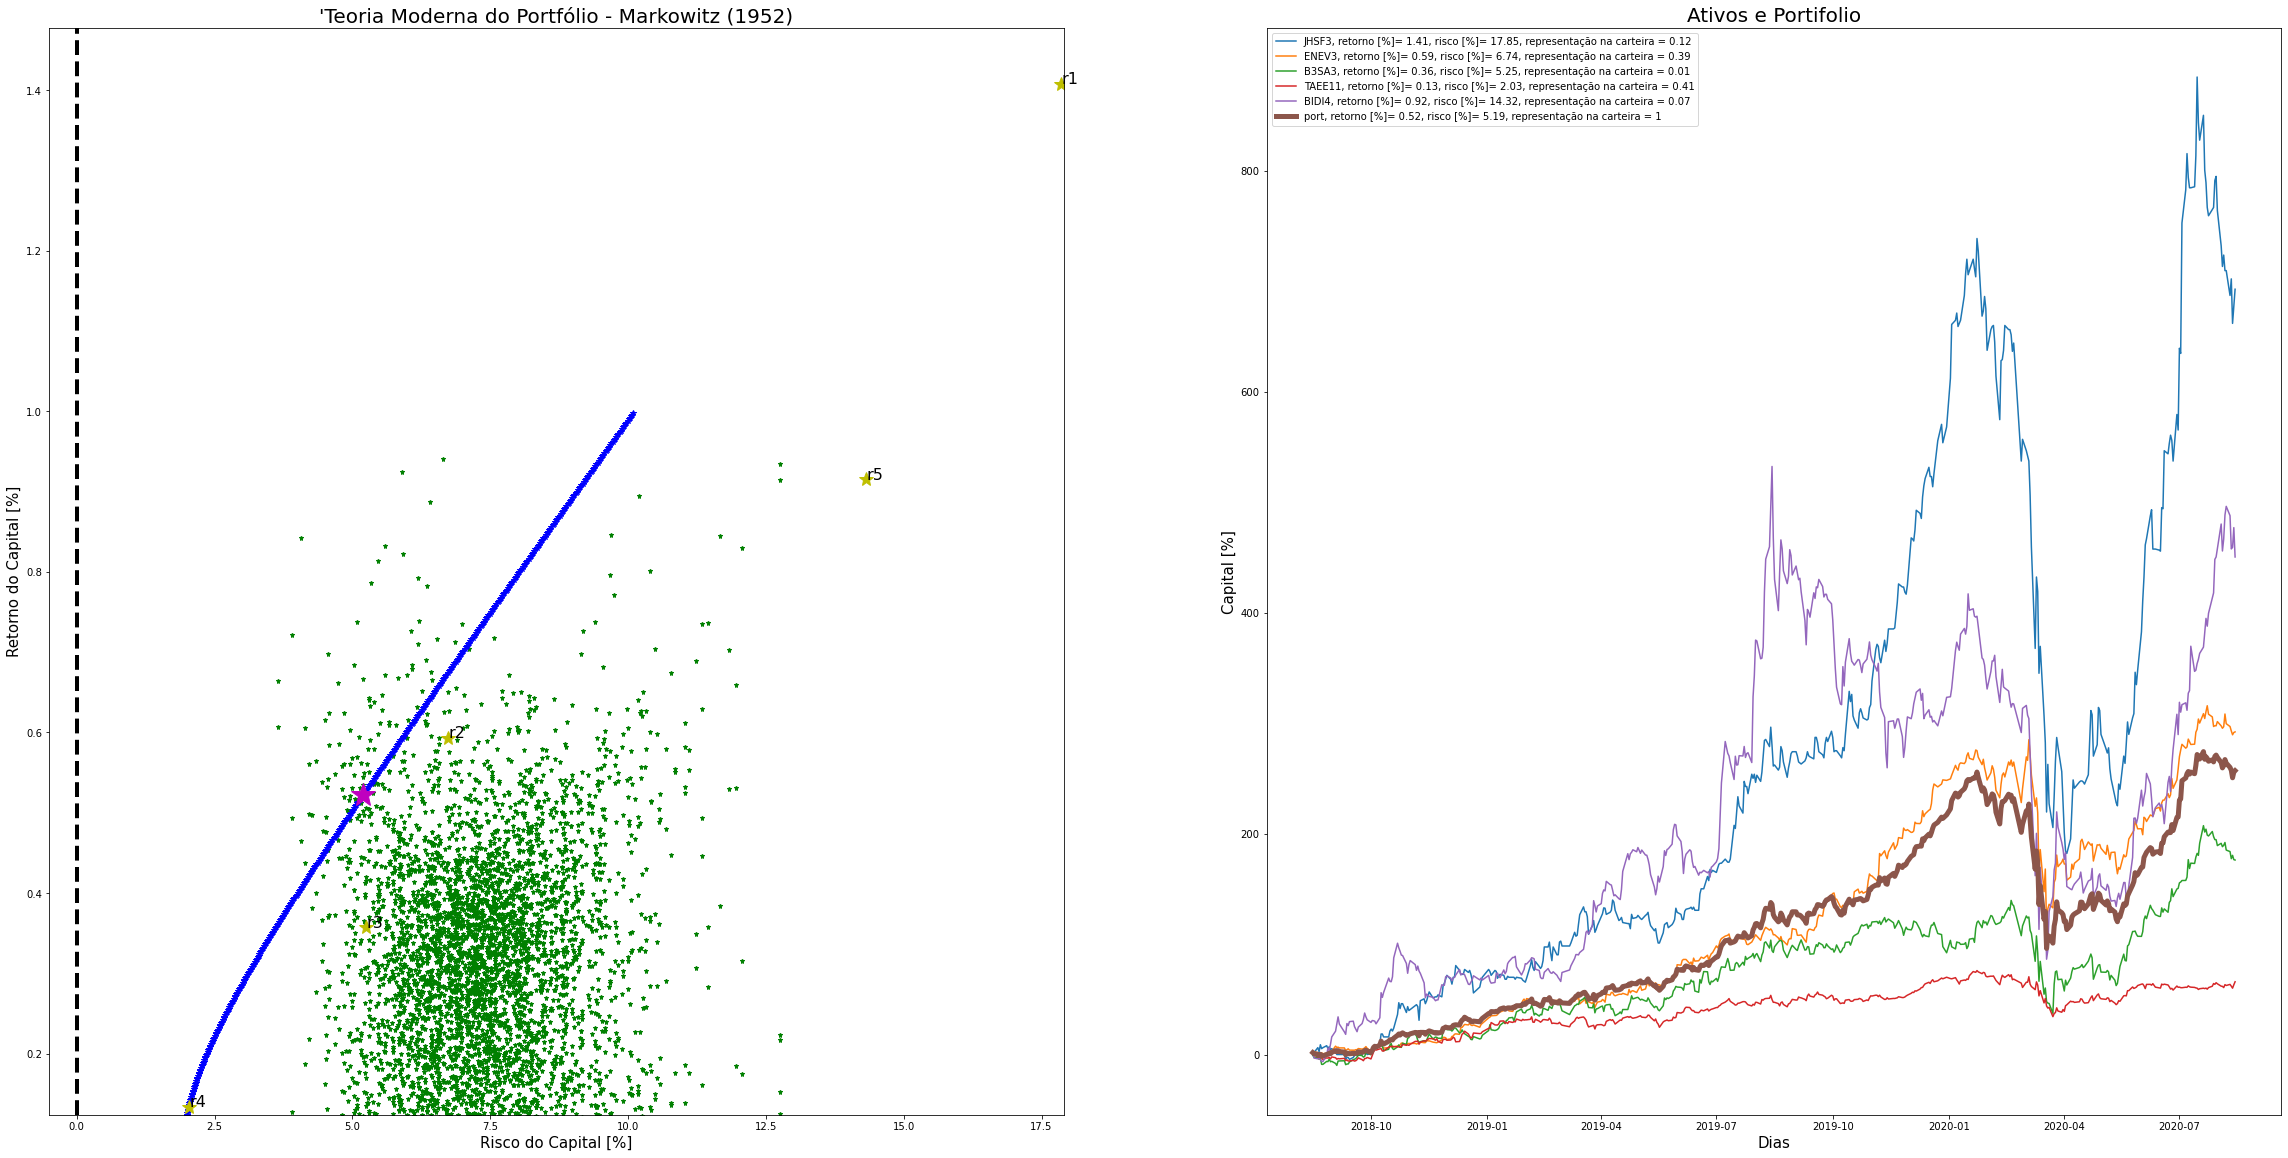

In [45]:
fig = plt.subplots(figsize=(40,20))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.07])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()


ret=ret.drop(columns=['port'])

### Questão 5: 

### Questão 6: 